# 데이터

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 16.4 MB/s eta 0:00:00


In [ ]:
# 라이브러리 불러오기
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


한글 폰트에 문제가 생겼을 때

In [ ]:
# 나눔 고딕 폰트 설치하기
!apt-get update -qq
!apt-get install -qq fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# 설치한 폰트를 matplotlib에서 사용할 수 있도록 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import os

In [ ]:
# 나눔 고딕 폰트 경로 설정하기
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가하기
fm.fontManager.addfont(font_path)

In [ ]:
# matplotlib의 폰트 캐시 삭제하기
font_cache_dir = os.path.join(os.path.expanduser('~'), '.cache', 'matplotlib')
if os.path.exists(font_cache_dir):
    import shutil
    shutil.rmtree(font_cache_dir)

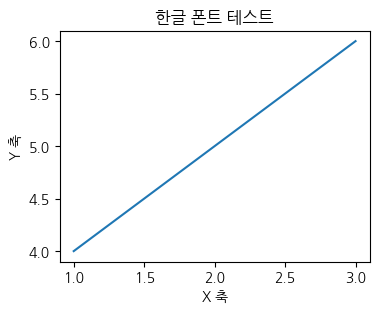

In [ ]:
# 폰트 설정하기
plt.rc('font', family='NanumGothic')

# 예제 그래프 생성하기
plt.figure(figsize=(4, 3))
plt.title('한글 폰트 테스트')
plt.plot([1, 2, 3], [4, 5, 6])
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()

## 데이터 업로드

#### 학습 데이터 불러오기

프롬프트로 생성된 '일반 대화' 합성 데이터와 원본 데이터가 합쳐진 파일

In [ ]:
# 학습 데이터셋 불러오기
# 경로를 적절히 수정해주세요.
train_data_path ="/content/drive/MyDrive/07. GoData/20. DKTC/conversations.csv"
train_data = pd.read_csv(train_data_path)

In [ ]:
train_data.sample(10)

,idx,class,conversation
3578,3578,일반 대화,"영화 감상 취미로 좋아해?\n응, 다양한 장르의 영화를 봐.\n요즘 무슨 취미 있어..."
3720,3720,협박 대화,오빠 저랑 사귀어주세요. 오빠 신인때부터 제가 응원해왔고 오빠가 여기까지 올라올수 ...
2399,2399,갈취 대화,당신 지금 돈 얼마 있어?\n 저 돈 없는데요.\n 거짓말하지 마! 지금 빨리 지갑...
1712,1712,기타 괴롭힘 대화,가위바위보해서 딱밤맞기하자\n그래! 가위바위보!\n내가 이겼다 퍽!\n?내가 보자기...
4544,4544,기타 괴롭힘 대화,생긴 것 봐라. 니네 부모님은 무슨 잘못을 하셔서 이런 자식을 낳으셨냐\n뭐라는거야...
697,697,직장 내 괴롭힘 대화,이거 오늘까지 되나? 퇴근전까지 말이야\n퇴근까지 20분 남았는데 양이. 안될것같은...
1104,1104,기타 괴롭힘 대화,대체 왜 나를 이렇게 괴롭히는거야?\n뭐야 너가 질문을 해?\n너는 그냥 묻는 말에...
113,113,기타 괴롭힘 대화,우리 귀여운 철수야 여기 돈 줄테니까 핫도그랑 콜라좀 사다줄래? 남은 돈은 너 가져...
3146,3146,직장 내 괴롭힘 대화,헤에 윤경씨 뭐먹어?\n네? 아 곧 결혼식이라 조금씩 자주 먹고 있어요\n아 그래?...
2143,2143,협박 대화,뭐하는 새끼야\n미안해\n말로만 미안하면 다야?\n그게 아니라\n짜증나네 니 약점 ...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idx           4950 non-null   int64 
 1   class         4950 non-null   object
 2   conversation  4950 non-null   object
dtypes: int64(1), object(2)
memory usage: 116.1+ KB


## Augmentation

## EDA

In [ ]:
# Colab에서 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [ ]:
# 클래스 별 대화 확인해보기
class_counts = train_data.groupby('class').size()
class_counts

class
갈취 대화           981
기타 괴롭힘 대화      1094
일반 대화          1000
직장 내 괴롭힘 대화     979
협박 대화           896
dtype: int64

* 갈취 대화(981)
* 기타 괴롭힘 대화(1094)
* 일반 대화(1000)
* 직장 내 괴롭힘 대화(979)
* 협박 대화(896)

#### 길이 분포 확인

In [ ]:
# 길이 분포 확인하기
print('Data Information')
print('-'*50)
print('Conversations :',train_data['conversation'].shape)
print('Label :',train_data['class'].shape)
print('Label Type:', set(train_data['class']))
print('-'*50)
num_classes = 4
print('The number of classes : {}'.format(num_classes))
print('-'*50)
print('Max Length :{}'.format(max(len(l) for l in train_data['conversation'])))
print('Average Length :{}'.format(sum(map(len, train_data['conversation']))/len(train_data['conversation'])))

Data Information
--------------------------------------------------
Conversations : (4950,)
Label : (4950,)
Label Type: {'기타 괴롭힘 대화', '일반 대화', '협박 대화', '직장 내 괴롭힘 대화', '갈취 대화'}
--------------------------------------------------
The number of classes : 4
--------------------------------------------------
Max Length :874
Average Length :232.0210101010101


#### 클래스 별 분포 확인

In [ ]:
# 두 서브플롯 생성하기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# 샘플 길이의 히스토그램
axes[0].hist([len(s) for s in train_data['conversation']], bins=50, color='skyblue')
axes[0].set_xlabel('Length of samples')
axes[0].set_ylabel('Number of samples')
axes[0].set_title('Sample Length Distribution')

# 클래스별 샘플 수 플롯
sns.countplot(x=train_data['conversation'], ax=axes[1], palette='pastel')
axes[1].set_title('Class Distribution')

# 레이아웃 조정하기
plt.tight_layout()

# 플롯 표시하기
plt.show()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-15-c84946256033>:15: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.tight_layout()
<ipython-input-15-c84946256033>:15: UserWarning: Glyph 49800 (\N{HANGUL SYLLABLE SYU}) missing from current font.
  plt.tight_layout()
<ipython-input-15-c84946256033>:15: UserWarning: Glyph 45916 (\N{HANGUL SYLLABLE DEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-15-c84946256033>:15: UserWarning: Glyph 50521 (\N{HANGUL SYLLABLE ANG}) missing from current font.
  plt.tight_layout()
<ipython-input-15-c84946256033>:15: UserWarning: Glyph 44405 (\N{HANGUL SYLLABLE GULG}) missing from current font.
  plt.tight_layout()
<ipython-input-15-c84946256033>:15: UserWarning: Glyph 52884 (\N{HANGUL SYLLABLE KAEN}) missing from current font.
  plt.tight_layout()
<ipython-input-15-c84946256033>:15: UserWarning: Glyph 51789 (\N{HANGUL SYLLABLE JJEOG}) missing from current font.
  plt.tight_layout()
<ipython-input-

#### 클래스 별 길이 분포 확인

In [ ]:
# 서브플롯 생성하기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 샘플 길이의 히스토그램 그리기

# 협박 대화
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='협박 대화']],
                bins=50, color='skyblue')
axes[0][0].set_xlabel('Length of samples')
axes[0][0].set_ylabel('Number of samples')
axes[0][0].set_title('협박 대화')

# 갈취 대화
axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='갈취 대화']],
                bins=50, color='salmon')
axes[0][1].set_xlabel('Length of samples')
axes[0][1].set_ylabel('Number of samples')
axes[0][1].set_title('갈취 대화')

# 직장 내 괴롭힘 대화
axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화']],
                bins=50, color='lightgreen')
axes[1][0].set_xlabel('Length of samples')
axes[1][0].set_ylabel('Number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

# 기타 괴롭힘 대화
axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='기타 괴롭힘 대화']],
                bins=50, color='orchid')
axes[1][1].set_xlabel('Length of samples')
axes[1][1].set_ylabel('Number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

#### 화자 별 특징 분석

In [ ]:
# 불용어 리스트 불러오기

# 경로를 적절히 수정해주세요.
stopwords_path = "/content/drive/MyDrive/07. GoData/20. DKTC/ko_stopwords.txt"
with open(stopwords_path, 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

In [ ]:
# A와 B의 대화를 담을 리스트 초기화하기
A_conversations = []
B_conversations = []

In [ ]:
# 대화 열을 반복하면서 각 대화를 분할하기
for conversation in train_data['conversation']:
    try:
        lines = conversation.split('\n')
        # 홀수 줄은 A, 짝수 줄은 B에 추가하기
        A_conv = '\n'.join([line for idx, line in enumerate(lines) if idx % 2 == 0])
        B_conv = '\n'.join([line for idx, line in enumerate(lines) if idx % 2 == 1])
        A_conversations.append(A_conv)
        B_conversations.append(B_conv)
    except ValueError:
        # 대화가 정확히 두 부분으로 나뉘지 않는 경우 처리하기
        A_conversations.append(conversation)
        B_conversations.append('')

In [ ]:
# A와 B를 위한 새로운 데이터프레임 생성하기
A_data = pd.DataFrame({'idx': train_data['idx'], 'class': train_data['class'], 'conversation': A_conversations})
B_data = pd.DataFrame({'idx': train_data['idx'], 'class': train_data['class'], 'conversation': B_conversations})

In [ ]:
# A의 head() 출력하기
print("A 데이터셋의 첫 5개 행:")
print(A_data.head())

In [ ]:
# B의 head() 출력하기
print("B 데이터셋의 첫 5개 행:")
print(B_data.head())

In [ ]:
# Okt 형태소 분석기 초기화하기
# Okt 형태소 분석기 객체 생성하기
okt = Okt()

명사 및 형태소 통계 확인하기

In [ ]:
# 기본 불용어 사전 불러오기
with open('/content/drive/MyDrive/07. GoData/20. DKTC/ko_stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = set(file.read().splitlines())

In [ ]:
# 추가 불용어 목록 및 특수문자, 공백 추가
additional_stopwords = [
    '것', '안', '못', '왜', '이', '저', '그', '사람', '너', '저희', '우리', '나', '너희', '당신',
    '하지만', '그리고', '거나', '그러나', '그러면', '그런데', '그러므로', '그래서', '그럼', '근데', '그래',
    '즉', '따라서', '이와', '여기', '저기', '거기', '이곳', '그곳', '저곳', '거기', '하나', '둘', '셋', '넷',
    '.', ',', '!', '?', ' ', ''
]

In [ ]:
# 추가 불용어를 기본 불용어 사전에 추가하기
stopwords.update(additional_stopwords)

In [ ]:
# 명사를 추출하는 함수 정의하기
def extract_nouns(conversations, stopwords):
    okt = Okt()
    all_nouns = []
    for conversation in conversations:
        nouns = okt.nouns(conversation)
        filtered_nouns = [noun for noun in nouns if noun not in stopwords]
        all_nouns.extend(filtered_nouns)
    noun_counter = Counter(all_nouns)
    return noun_counter

In [ ]:
# 형태소를 추출하는 함수 정의하기
def extract_morphs(conversations, stopwords):
    okt = Okt()
    all_morphs = []
    for conversation in conversations:
        morphs = okt.morphs(conversation)
        filtered_morphs = [morph for morph in morphs if morph not in stopwords]
        all_morphs.extend(filtered_morphs)
    morph_counter = Counter(all_morphs)
    return morph_counter

In [ ]:
# 텍스트 전처리 함수 정의하기 (특수문자 제거하기)
import re

def preprocess_text(text):
    # 특수문자 제거 및 소문자로 변환
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
# 상위 10개의 명사와 형태소를 시각화하기
def plot_top_10(noun_data, morph_data, title_noun, title_morph):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # 상위 10개의 명사
    top_10_nouns = noun_data.head(10)
    axs[0].bar(top_10_nouns['Noun'], top_10_nouns['Frequency'], color='skyblue')
    axs[0].set_title(title_noun)
    axs[0].set_xlabel('Noun')
    axs[0].set_ylabel('Frequency')
    axs[0].tick_params(axis='x', rotation=45)

    # 상위 10개의 형태소
    top_10_morphs = morph_data.head(10)
    axs[1].bar(top_10_morphs['Morph'], top_10_morphs['Frequency'], color='lightgreen')
    axs[1].set_title(title_morph)
    axs[1].set_xlabel('Morph')
    axs[1].set_ylabel('Frequency')
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
# 대화 데이터를 각 클래스별로 나누기
classes = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화']
class_data = {cls: train_data[train_data['class'] == cls] for cls in classes}

In [ ]:
# 각 클래스별 명사와 형태소를 추출하여 불용어 제거하기
class_noun_counters = {cls: extract_nouns(data['conversation'], stopwords) for cls, data in class_data.items()}
class_morph_counters = {cls: extract_morphs(data['conversation'], stopwords) for cls, data in class_data.items()}

In [ ]:
# 각 클래스별 명사와 형태소 통계를 데이터프레임으로 전환하기
class_noun_stats = {cls: pd.DataFrame(counter.items(), columns=['Noun', 'Frequency']).sort_values(by='Frequency', ascending=False) for cls, counter in class_noun_counters.items()}
class_morph_stats = {cls: pd.DataFrame(counter.items(), columns=['Morph', 'Frequency']).sort_values(by='Frequency', ascending=False) for cls, counter in class_morph_counters.items()}

In [ ]:
# 각 클래스별 상위 10개의 명사와 형태소를 2x2 서브플롯 형태로 시각화하기
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
plot_titles = {
    '협박 대화': ['Top 10 Nouns in Threatening Conversation', 'Top 10 Morphs in Threatening Conversation'],
    '갈취 대화': ['Top 10 Nouns in Extortion Conversation', 'Top 10 Morphs in Extortion Conversation'],
    '직장 내 괴롭힘 대화': ['Top 10 Nouns in Workplace Harassment', 'Top 10 Morphs in Workplace Harassment'],
    '기타 괴롭힘 대화': ['Top 10 Nouns in Other Harassment', 'Top 10 Morphs in Other Harassment']
}

for i, (cls, noun_data) in enumerate(class_noun_stats.items()):
    morph_data = class_morph_stats[cls]
    plot_top_10(noun_data, morph_data, plot_titles[cls][0], plot_titles[cls][1])

plt.tight_layout()
plt.show()

In [ ]:
# A와 B의 명사 추출하기
A_noun_counters = {cls: extract_nouns(A_data['conversation'], stopwords) for cls, data in class_data.items()}
B_noun_counters = {cls: extract_nouns(B_data['conversation'], stopwords) for cls, data in class_data.items()}

In [ ]:
# A와 B의 형태소 추출하기
A_morph_counters = {cls: extract_morphs(A_data['conversation'], stopwords) for cls, data in class_data.items()}
B_morph_counters = {cls: extract_morphs(B_data['conversation'], stopwords) for cls, data in class_data.items()}

In [ ]:
# 명사 통계를 데이터프레임으로 전환하기
A_noun_stats = {cls: pd.DataFrame(A_noun_counters.items(), columns=['Noun', 'Frequency']).sort_values(by='Frequency', ascending=False) for cls, counter in class_noun_counters.items()}
B_noun_stats = {cls: pd.DataFrame(B_noun_counters.items(), columns=['Morph', 'Frequency']).sort_values(by='Frequency', ascending=False) for cls, counter in class_morph_counters.items()}

In [ ]:
# 형태소 통계를 데이터프레임으로 전환하기
A_morph_stats = {cls: pd.DataFrame(A_noun_counters.items(), columns=['Morph', 'Frequency']).sort_values(by='Frequency', ascending=False) for cls, counter in class_morph_counters.items()}
B_morph_stats = {cls: pd.DataFrame(B_noun_counters.items(), columns=['Morph', 'Frequency']).sort_values(by='Frequency', ascending=False) for cls, counter in class_morph_counters.items()}

In [ ]:
# A와 B 데이터의 상위 10개 명사 및 형태소 시각화
# A 데이터의 상위 10개의 명사와 형태소를 서브플롯으로 그리기
plot_top_10(A_noun_stats, A_morph_stats, 'Top 10 Nouns in A Data', 'Top 10 Morphs in A Data')
plot_top_10(B_noun_stats, B_morph_stats, 'Top 10 Nouns in B Data', 'Top 10 Morphs in B Data')

명사, 형태소 별로 유의미한 결과를 도출하지 못했다. 따라서 전처리가 잘됐는지 살펴봐야 겠다.

기호, 공백을 제거해야 한다.

## 전처리

### 기본 전처리

중복값 여부 찾아보기

In [ ]:
# 중복값 찾기
duplicates = train_data[train_data.duplicated()]
duplicates

결측치 여부 확인하기

In [ ]:
# 결측치 여부 확인하기
train_data.isnull().sum()

클래스 컬럼 인코딩하기

In [ ]:
# 'class'를 'type'으로 매핑하는 딕셔너리 생성하기
class_to_type = {
    '협박 대화': 0,
    '갈취 대화': 1,
    '직장 내 괴롭힘 대화': 2,
    '기타 괴롭힘 대화': 3,
    '일반 대화': 4
}

In [ ]:
# 'class' 열을 기반으로 새로운 'type' 열 추가하기
train_data['type'] = train_data['class'].map(class_to_type)

In [ ]:
# type 열 추가했는지 확인하기
train_data.head()

In [ ]:
# 기존 idx 컬럼 삭제하기
new_train_data = train_data.drop('idx', axis=1)
new_train_data = new_train_data.drop('class', axis=1)

* 협박 대화 : 0
* 갈취 대화 : 1
* 직장 내 괴롭힘 대화 : 2
* 기타 괴롭힘 대화 : 3
* 일반 대화 : 4

In [ ]:
# idx 컬럼 삭제했는지 확인하기
new_train_data.head()

In [ ]:
# new_train_data를 train_data에 덮어 씌우기
# train_data = new_train_data

토큰 개수 분포 확인하기

In [ ]:
# 토큰 개수 계산 함수 정의하기
def count_tokens(conversations):
    token_counts = []
    for conversation in conversations:
        tokens = okt.morphs(conversation)
        token_counts.append(len(tokens))
    return token_counts

In [ ]:
# 데이터의 토큰 개수 계산
token_counts = count_tokens(new_train_data['conversation'])

In [ ]:
# 토큰 개수 분포 시각화
def plot_token_distribution(token_counts, title):
    plt.figure(figsize=(10, 5))
    plt.hist(token_counts, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# 데이터의 토큰 개수 분포 시각화
plot_token_distribution(token_counts, 'Token Count Distribution in Data')

명사 및 형태소 통계 확인하기

In [ ]:
noun_counters = {cls: extract_nouns(new_train_data['conversation'], stopwords) for cls, data in class_data.items()}

In [ ]:
morph_counters = {cls: extract_morphs(new_train_data['conversation'], stopwords) for cls, data in class_data.items()}

In [ ]:
noun_stats = pd.DataFrame(noun_counters.items(), columns=['Noun', 'Frequency']).sort_values(by='Frequency', ascending=False)

In [ ]:
morph_stats = pd.DataFrame(morph_counters.items(), columns=['Morph', 'Frequency']).sort_values(by='Frequency', ascending=False)

In [ ]:
plot_top_10(noun_stats, morph_stats, 'Top 10 Nouns in Data', 'Top 10 Morphs in Data')

### 기타 전처리

정수 인코딩 및 패딩처리하기

### 토큰화

## 전처리 후 분석

## 데이터 분할